In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

SR=44100


In [89]:
def load_hibou_audio_files(directory, sr, n_mfcc=13):
    features = []
    labels = []
    filenames = []
    class_names = sorted(os.listdir(directory))

    for class_name in class_names:
        for filename in os.listdir(os.path.join(directory, class_name)):
            if filename.endswith(".wav"):
                filepath = os.path.join(directory, class_name, filename)
                audio, _ = librosa.load(filepath, sr=sr)
                features.append(audio)
                labels.append(class_name)
                filenames.append(filename)

    return np.array(features), np.array(labels), filenames
x, y, filenames = load_hibou_audio_files("../data/raw/hibou_dataset", sr=SR)

other 0008_min_234.wav


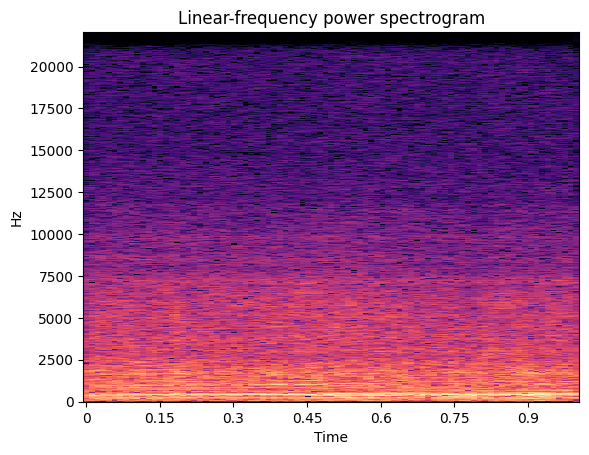

In [91]:
def show_spectogram(feature, sr):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(feature)), ref=np.max)
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

    img = librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()

# 4156 is the last drone
i = 4159
print(y[i], filenames[i])
show_spectogram(x[i], sr=SR)
from IPython.display import Audio
Audio(data=x[i], rate=SR)

In [ ]:
def show_melspectogram(feature, sr):
    S = librosa.melspectrogram(y=audio, sr=sr, n_mels=128)  # n_mels controls frequency resolution
    D = librosa.amplitude_to_db(np.abs(librosa.stft(feature)), ref=np.max)
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

    img = librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()